## Density estimation on Psychological experiments

### In this project, I'm focusing on estimating the distributions of the amygdala and ACC (anterior cingulate cortex) regions using 1-dimensional histogram and Kernel Density Estimation (KDE) techniques.

### This involves visualizing the distribution shapes clearly by deciding on a suitable number of bins for the histogram and setting an appropriate kernel bandwidth (h) for the KDE. The goal is to gain insights into the distribution patterns of these brain regions, which are crucial for understanding various cognitive and emotional processes.

In [28]:
import csv
import numpy as np
import numpy.matlib
import pandas as pd
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

# load dataset
path = 'data/n90pol.csv'
data = pd.read_csv(path,header=None).to_numpy() 

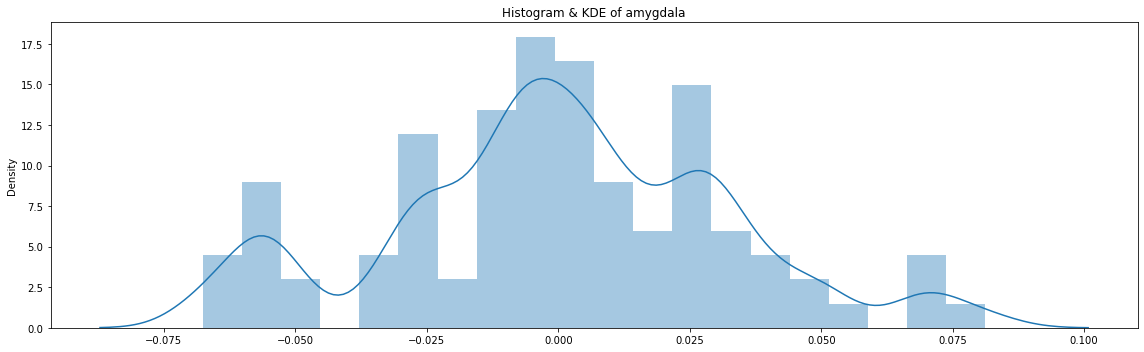

In [29]:
import warnings
warnings.filterwarnings('ignore')

# https://seaborn.pydata.org/tutorial/distributions.html

df1 = pd.DataFrame(data[:,0])
 
# plotting histogram and density plot
plt.figure(figsize=(16, 5))
sns.distplot(df1,  bins = 20, kde=True, kde_kws={'bw':0.2})
plt.title("Histogram & KDE of amygdala")
plt.show()

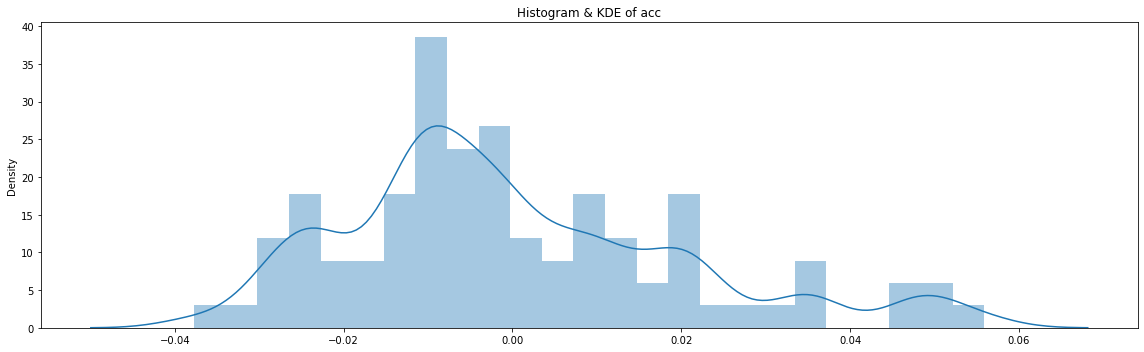

In [30]:
df2 = pd.DataFrame(data[:,1])
 
# plotting histogram and density plot
# for carat using distplot() by setting color
plt.figure(figsize=(16, 5))
sns.distplot(df2,  bins = 25, kde=True, kde_kws={'bw':0.2})
plt.title("Histogram & KDE of acc")
plt.show()

### Next, I form 2-dimensional histogram for the pairs of variables (amygdala, acc) and decide on a suitable number of bins so I can see the shape of the distribution clearly.

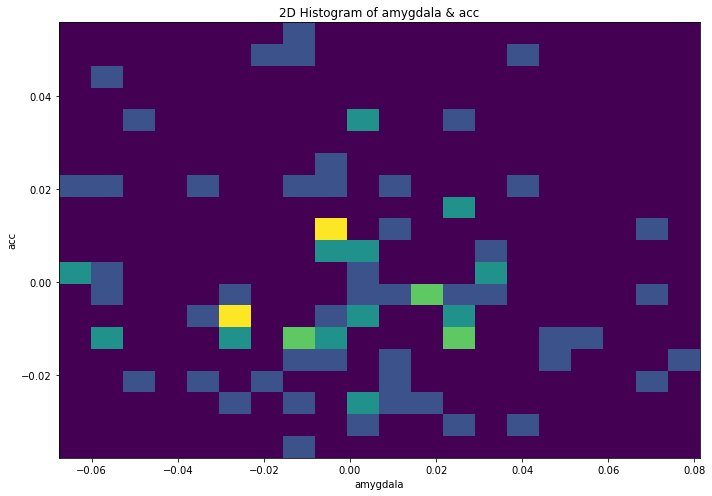

In [31]:
x = data[:,0]
y = data[:,1]
x_min = np.min(x)
x_max = np.max(x)
  
y_min = np.min(y)
y_max = np.max(y)
  
x_bins = np.linspace(x_min, x_max, 25)
y_bins = np.linspace(y_min, y_max, 25)

fig, ax = plt.subplots(figsize =(10, 7))
plt.hist2d(x, y, bins=(20,20)) #[x_bins, y_bins]
plt.title("2D Histogram of amygdala & acc")
ax.set_xlabel('amygdala') 
ax.set_ylabel('acc') 
  
plt.tight_layout() 
plt.show()

### Let's Use kernel-density-estimation (KDE) to estimate the 2-dimensional density function of (amygdala, acc) by setting an appropriate kernel bandwidth (h > 0), 

If we use h = 0.35, we see a bi-modal distribution and can't spot any visible outlier.
The KDE plot shows the datapoints of the two variables are concentrated in the middle and there is no clear trend. Hence, the two variables are likely to be independent.   

0.41


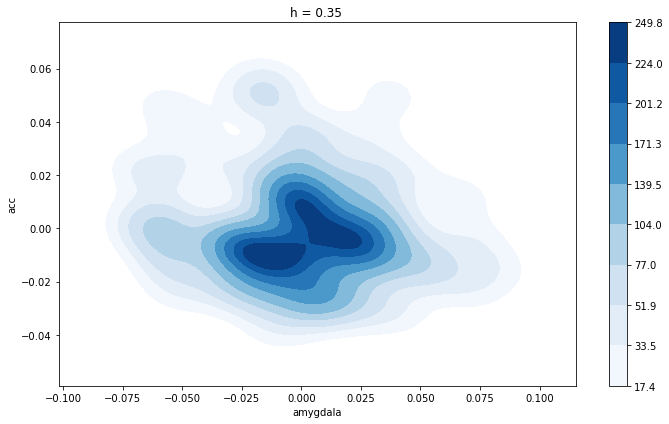

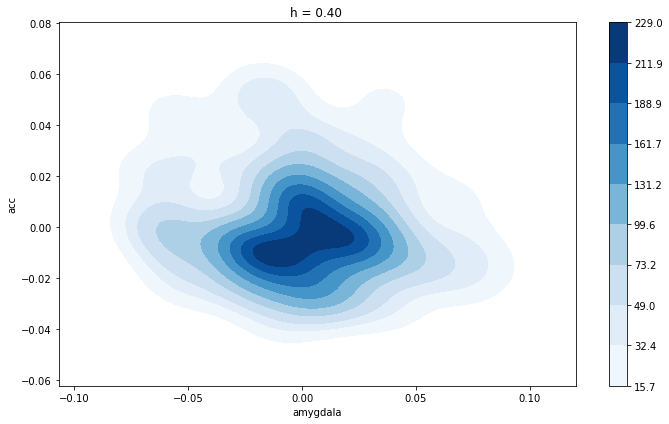

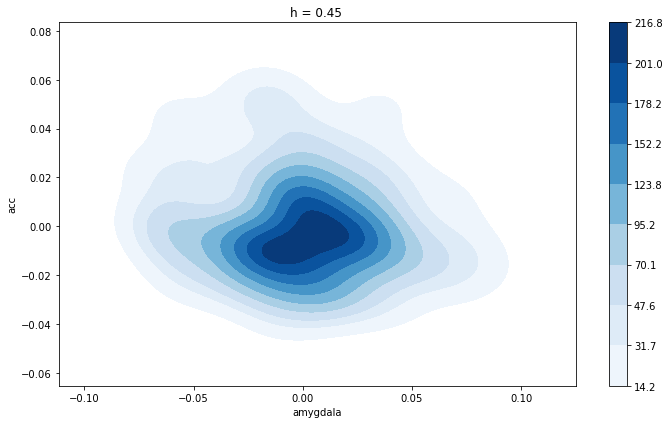

In [32]:
# h ~ m ^(-1/5)
m = x.shape[0]
print(round(m**(-1/5),2))

# plot with different h (bandwidth)
h = np.array([0.35,0.4,0.45])
for i in h:
    fig, ax = plt.subplots(figsize =(10, 6))
    sns.kdeplot(x,y, bw_method=i, shade=True,cmap="Blues",cbar=True)
    plt.title('h = %.2f ' % i)
    ax.set_xlabel('amygdala') 
    ax.set_ylabel('acc') 
    plt.show()

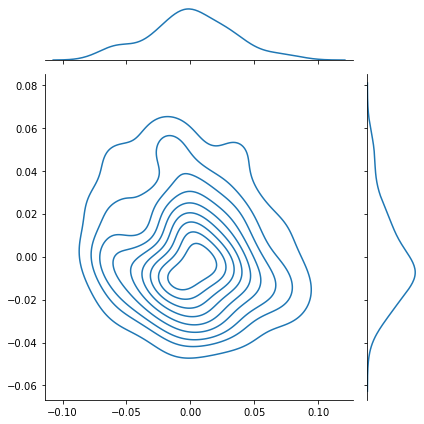

In [33]:
sns.jointplot(x,y, kind = 'kde')